<a id='top'></a>

# What is the True Normal Human Body Temperature? 

EXERCISES FOR THE SPRINGBOARD DATA SCIENCE INTENSIVE

---
### Background

The mean normal body temperature was held to be 37°C or 98.6°F for more than 120 years after it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

---
### The Data
* Available Here: http://www.amstat.org/publications/jse/jse_data_archive.htm (Scroll down about 3/4 of the page.)


* More Information: http://www.amstat.org/publications/jse/datasets/normtemp.txt

---
### Analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance. 

ANSWER THE FOLLOWING QUESTIONS:

[Is the distribution of body temperatures normal?](#one)

       
[Is the sample size large? Are the observations independent?](#two)

    
[Is the true population mean really 98.6°F?](#three)
* Is it best to use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the $t$ or $z$ statistic? 
* Try using the other test. How is the result different? Why?


[Draw a sample of size 10 from the data and repeat both tests.](#four)
* Which one is the correct one to use? 
* What is noticeable? What does this say about the difference in application of the $t$ and $z$ statistic?

    
[At what value is one's temperature considered 'abnormal'?](#five)

    
[Is there a significant difference between males and females in normal temperature?](#six)
* What test is used and why?


### [Write a story with a conclusion in the context of the original problem.](#summary)

---

## Import and Inspect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Read and save dataset as a dataframe:
df = pd.read_csv('data/human_body_temperature.csv')

# Inspect the state of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
# Inspect the structure of the dataframe:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Get a NULL count for each column in the dataframe:
df.isnull().sum() 

temperature    0
gender         0
heart_rate     0
dtype: int64

In [5]:
# Inspect duplicate observations:
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


Since this is a dataset commonly used for practice exercises no issues were expected. Nonetheless, inspection is a prudent first step. No invalid observations are apparent and indexing of the duplicate records suggests they are merely a coincidence. Heart rate is not mentioned in the exercise requirements, but it could be interesting to look at the possible relationship with body temperature. 

<a href='#top' id='one'>back to intro</a>

## Is the Distribution of Body Temperatures Normal?

Since temperature data are continuous, a look at the Probability Density Function provides a view of the distribution: 

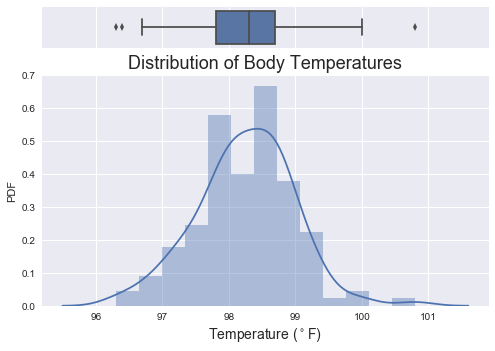

In [6]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

Indeed, while outliers are present, the distribution of body temperatures appears normal. For the sake of ruling out binning bias and comparison to a theoretical normal distribution (and practice), a look at the Cumulative Distribution Function is next:

In [7]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

In [8]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df.temperature)

# Sample Mean:
M = np.mean(df.temperature)

# Sample Standard Deviation:
s = np.std(df.temperature)

print('n =', n, '\nM =', M, '\ns =', s)

n = 130 
M = 98.24923076923078 
s = 0.7303577789050377


In [9]:
# Seed the random number generator:
np.random.seed(15)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([ 98.02111923,  98.49702999,  98.13536176, ...,  98.79844721,
        97.6501198 ,  98.22401087])

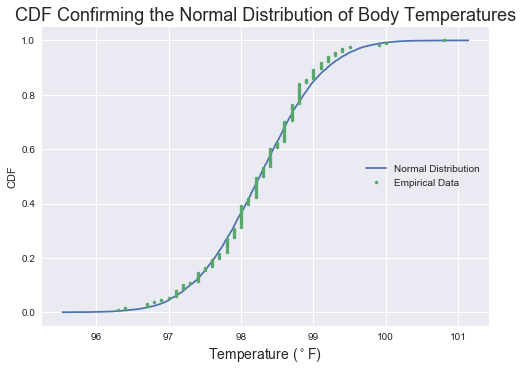

In [10]:
# Compute CDFs:
x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=18)


# Save and display the plots:
plt.savefig('reports/figures/cdf_body_temps.png')
plt.show()

<a href='#top' id='two'>back to intro</a>

## Is the Sample Size Large? Are the Observations Independent?

In [11]:
# Print the body temperature sample size:
print('Sample Size:', n)

Sample Size: 130


The sample size, 130, for the body temperature dataset is greater than 30 which is considered large. 

The observations are independent, as they are not influenced by and reveal no information about any other observation. Each value for temperature represents a distinct measure of such.

<a href='#top' id='three'>back to intro</a>

## Is the True Population Mean Really 98.6°F?

* Is it best to use a one-sample or two-sample test? Why?


* In this situation, is it appropriate to use the $t$ or $z$ statistic?


* Try using the other test. How is the result different? Why?

---

It is best to use a **one-sample test** since one set of data is compared to a single value. For this situation, it is best to use a **t-statistic** since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

**Null Hypothesis**: The true population mean is equal to the conventional mean (98.6$^\circ$F).

$$H_0: \mu - 98.6 = 0$$


**Significance Level**: 99.9% Confidence

$$\alpha = 0.01$$

In [12]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.45482329236
p-value: 2.41063204156e-07


In [13]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.36754645418 3.36754645418


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

First, a look at a few more tests. The z-test is not the most appropriate since the population standard deviation is not known; however, it can be approximated using the standard error of the mean:

In [14]:
# Calculate standard error of the mean:
sem = s/np.sqrt(n)

In [15]:
# Calculate and save z-statistic:
z = (M - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.47592520208
p-value: 4.35231516588e-08


As expected, the z-statistic is very close to the t-statistic and the p-value is also very low.

Another test method is to generate many sets of simulated data assuming the null hypothesis is true, then compute the test statistic for each simulated dataset:

In [16]:
# Define bootstrap functions:

def replicate(data, function):
    """Return replicate of a resampled data array."""
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))


def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

In [17]:
# Seed the random number generator:
np.random.seed(15)


# Make an array of translated temperatures:
translated_temps = df.temperature - M + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_replicates <= M) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


In every test the p-value is significantly less than 0.01, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that the true population mean is the conventional normal human body temperature of 98.6°F.

<a href='#top' id='four'>back to intro</a>

## Draw a Sample of Size 10 from the Data and Repeat Both Tests

* Which one is the correct one to use?


* What is noticeable? What does this say about the difference in application of the $t$ and $z$ statistic?

---

This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.

In [18]:
# Seed the random number generator:
np.random.seed(15)


# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [19]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.68826445858
p-value: 0.0248671106512


In [20]:
# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.83367954733
p-value: 0.0046015450048


In [21]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

-2.26215716274 2.26215716274


In [22]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.78091258593 4.78091258593


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.

<a href='#top' id='five'>back to intro</a>

## At what value is one's temperature considered 'abnormal'?

The null hypothesis was rejected with a 99.9% confidence interval, but analysis of abnormal values at different levels may be helpful.

In [23]:
from scipy.stats import norm

# Save the critical value at 99.95% confidence:
z_critical = norm.ppf(0.9995)
z_critical

3.2905267314919255

In [24]:
print('Standard Error of the Mean:', sem)

# Calculate and save the margin of error:
moe = z_critical * sem
print('Margin of Error:', moe)

Standard Error of the Mean: 0.0640566146952
Margin of Error: 0.210780002983


In [25]:
# Calculate and save the 99.9% confidence interval:
CI = np.array([M - moe, M + moe])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.03845077  98.46001077]


Another method to check the confidence interval:

In [26]:
# Seed the random number generator:
np.random.seed(15)


# Draw bootstrap replicates of temperatures:
replicates = draw_replicates(df.temperature, np.mean, 10000)

# Compute the 99.9% confidence interval:
CI = np.percentile(replicates, [0.05, 99.95])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [ 98.04384577  98.45923154]


Even at a 99.9% confidence interval, the range of temperatures is only 98.0 - 98.5°F. Statistics in this case seem to fall short of determining the abnormal body temperature.

Though the conventional human body temperature was rejected as the true population mean, values outside the confidence interval should not be rejected as plausible normal body temperatures.

Surely no supervisor or teacher would consider a temperature of 98.6°F to be excusable for absence from work or school!

Or perhaps 'abnormal' should be defined. Relying on the confidence interval does not reconcile with this definition: [deviating from what is normal or usual, typically in a way that is undesirable or worrying.](https://en.oxforddictionaries.com/definition/abnormal)

---

UPDATE:

OR, confidence interval is the wrong statistic to check! Since CI is calculated using estimated population statistics, the estimations are going to be more certain the larger the sample size. An individual draw from a normal distribution, however, should be checked against the prediction interval. This is calculated using the sample standard deviation. Since an individual's temperature is one sample, it should be evaluated by the sample statistics for an individual (i.e., `n=1`).

Here is a very simple method to determine the 95% prediction interval:

In [27]:
# Calculate and save the 95% prediction interval:
PI = stats.norm.interval(0.95, loc=M, scale=s)
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81775582674824, 99.680705711713316)


That is definitely more intuitive! 

And so easy.

But to grasp the logic:

In [28]:
# Save the critical value at 95% confidence:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [29]:
# Calculate and save the margin of error:
moe = z_critical * s
print('Margin of Error:', moe)

# Calculate and save the 95% prediction interval:
PI = np.array([M - moe, M + moe])
print('95% Prediction Interval:', PI)

Margin of Error: 1.43147494248
95% Prediction Interval: [ 96.81775583  99.68070571]


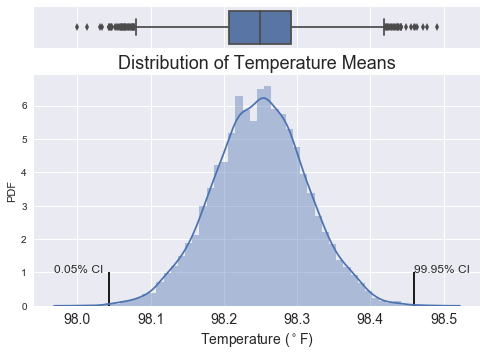

In [30]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for temperature:
sns.boxplot(replicates, ax=boxplot)

# Add histogram for temperature:
sns.distplot(replicates, ax=histogram)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Temperature Means', fontsize=18)

# Add text and lines marking the 99.9% confidence interval:
plt.text(x=CI[0]-0.075, y=1, s='0.05% CI')
plt.vlines(ymin=0, ymax=1, x=CI[0])
plt.text(x=CI[1], y=1, s='99.95% CI')
plt.vlines(ymin=0, ymax=1, x=CI[1])

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

The graph above demonstrates the narrow, erroneous statistic for this exercise. While the revised graph below shows the big discrepancy in the different statistics.

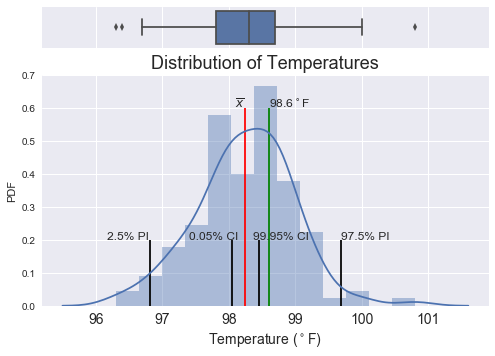

In [31]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Temperatures', fontsize=18)

# Add text and lines marking the 99.9% confidence interval:
plt.text(x=CI[0]-0.65, y=0.2, s='0.05% CI')
plt.vlines(ymin=0, ymax=0.2, x=CI[0])
plt.text(x=CI[1]-0.1, y=0.2, s='99.95% CI')
plt.vlines(ymin=0, ymax=0.2, x=CI[1])

# Add a lines for different means:
plt.text(x=M-0.15, y=0.6, s='$\overline{x}$')
plt.vlines(ymin=0, ymax=0.6, x=M, color='red')
plt.text(x=98.6, y=0.6, s='98.6$^\circ$F')
plt.vlines(ymin=0, ymax=0.6, x=98.6, color='green')

# Add text and lines marking the 95% prediction interval:
plt.text(x=PI[0]-0.65, y=0.2, s='2.5% PI')
plt.vlines(ymin=0, ymax=0.2, x=PI[0])
plt.text(x=PI[1], y=0.2, s='97.5% PI')
plt.vlines(ymin=0, ymax=0.2, x=PI[1])

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Save and display the plots:
plt.savefig('reports/figures/pdf_temps.png')
plt.show()

Indeed, since a temperature at or below 95°F is considered hypothermia and a temperature at or above 100°F is a fever, temperatures outside the range of 96.8 to 99.7°F seem to fit the definition of abnormal. 

Teachers and supervisors, sorry for the error!

<a href='#top' id='six'>back to intro</a>

## Is There a Significant Difference Between Males and Females in Normal Temperature?

* What test is used and why?

---

It is best to use a **permutation test** since it exactly simulates the null hypothesis. A **two-sample t-test** is also appropriate since the means of two independent samples are compared. First, some graphical data analysis:

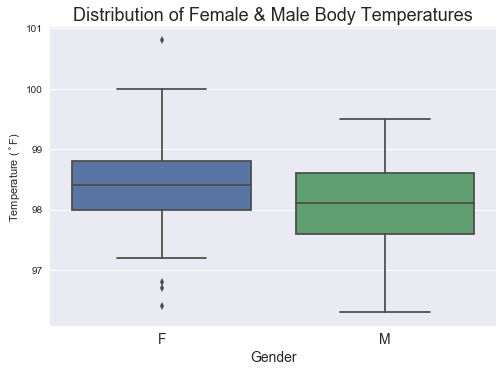

In [32]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [33]:
# Save temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


There is a difference between the mean temperatures of females and males in the sample data, but a statistical analysis will help determine if the difference is significant.

**Null Hypothesis**: There is no significant difference between female and male normal human body temperature.

$$H_0: \mu_{females} - \mu_{males} = 0$$


**Significance Level**: 95% Confidence

$$\alpha = 0.05$$

In [34]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [35]:
# Seed the random number generator:
np.random.seed(15)


# Compute difference of means:
empirical_difference = difference_of_means(female_temp, male_temp)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(female_temp, male_temp, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', empirical_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.013


With a p-value of 0.013, the null hypothesis is rejected; however, the significance is small.

In [36]:
# Save results of a two sample t-test:
t = stats.ttest_ind(female_temp, male_temp)[0]
p = stats.ttest_ind(female_temp, male_temp)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 2.28543453817
p-value: 0.0239318831224


In [37]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

-1.99772965363 1.99772965363


A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis is rejected. The difference in human body temperatures between females and males, though significant, is not extreme. Women tend to have a slightly higher body temperature.

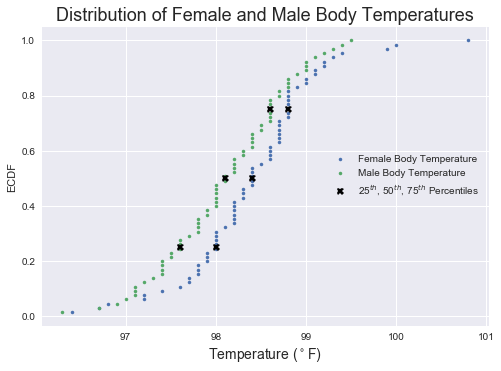

In [38]:
# Compute percentiles:
percentile = np.array([25,50,75])
f_percentiles = np.percentile(df.temperature[df.gender == 'F'], percentile)
m_percentiles = np.percentile(df.temperature[df.gender == 'M'], percentile)

# Compute ECDFs:
fx_temp, fy_temp = cdf(df.temperature[df.gender == 'F'])
mx_temp, my_temp = cdf(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot:
fig = plt.plot(fx_temp, fy_temp, marker='.', linestyle='none')
fig = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(f_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(m_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Female Body Temperature', 'Male Body Temperature', '25$^{th}$, 50$^{th}$, 75$^{th}$ Percentiles'), loc='center right')
fig = plt.title('Distribution of Female and Male Body Temperatures', fontsize=18)

# Save and display the plots:
plt.savefig('reports/figures/cdf_female_male_temps.png')
plt.show()

<a href='#top' id='seven'>back to intro</a>

## Is There a Relationship Between Heart Rate and Body Temperature?

Again, a graphical data analysis is performed before statistical analysis. 

First, a look at whether the distribution of heart rate is normal:

In [39]:
# Compute and save variables for summarizing empirical distribution -

# Sample Size:
n = len(df.heart_rate)

# Sample Mean:
M = np.mean(df.heart_rate)

# Sample Standard Deviation:
s = np.std(df.heart_rate)

print('Sample Size:', n, '\nSample Mean:', M, '\nSample Standard Deviation:', s)

Sample Size: 130 
Sample Mean: 73.76153846153846 
Sample Standard Deviation: 7.034862467797676


In [40]:
# Seed the random number generator:
np.random.seed(15)


# Simulate a random sample with the same distribution and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([ 71.56435055,  76.14835971,  72.66474337, ...,  79.05163359,
        67.99085537,  73.51861847])

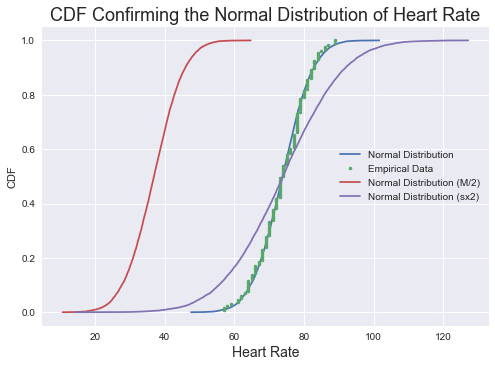

In [41]:
# Compute CDFs:
x_norm, y_norm = cdf(normal)
x_hr, y_hr = cdf(df.heart_rate)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_hr, y_hr, marker='.', linestyle='none')


# Seed the random number generator:
np.random.seed(15)

# Generate data to demonstrate optimal parameters -
# Take samples with half the mean:
samples_half = np.random.normal(M/2, s, 10000)
# Take samples with double the std:
samples_double = np.random.normal(M, s*2, 10000)

# Generate CDFs from these samples:
x_half, y_half = cdf(samples_half)
x_double, y_double = cdf(samples_double)

# Plot these CDFs as lines:
fig = plt.plot(x_half, y_half)
fig = plt.plot(x_double, y_double)


# Label axes and add legend and a title:
fig = plt.xlabel('Heart Rate', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data', 'Normal Distribution (M/2)', 'Normal Distribution (sx2)'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Heart Rate', fontsize=18)


# Display the plots:
plt.show()

Aside from confirming that the distribution of heart rate is normal, the graph demonstrates that the sample mean parameter is optimal in that it best reproduces the data.

Next, a graphical analysis of the relationship between heart rate and temperature:

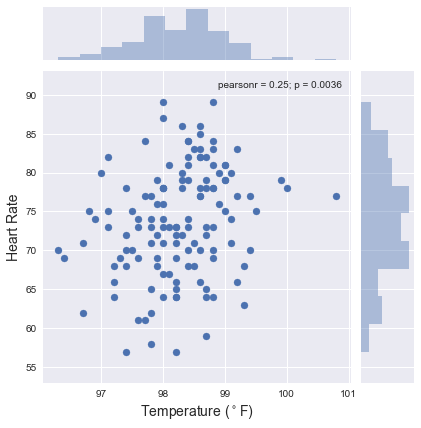

In [42]:
# Create a figure with a joint plot of temperature and heart rate:
fig = sns.jointplot(df.temperature, df.heart_rate)

# Add a little room around the margins:
plt.margins(0.125)

# Label axes and add title:
fig.set_axis_labels('Temperature ($^\circ$F)', 'Heart Rate', fontsize=14)

# Display the plots:
plt.show()

The graph function returned a correlation of 0.25 (p=0.004), but to demonstrate how, a simulation of the hypothesis that temperature and heart rate are totally independent of each other:

In [43]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix:
    correlation_matrix = np.corrcoef(x, y)

    # Return entry [0,1]:
    return correlation_matrix[0,1]

In [44]:
# Seed the random number generator:
np.random.seed(15)


# Compute and save empirical correlation:
r = pearson_r(df.temperature, df.heart_rate)

# Initialize array of permutation replicates:
permutation_replicates = np.empty(10000)

# Draw replicates:
for i in range(len(permutation_replicates)):
    temperature_permuted = np.random.permutation(df.temperature)

    # Compute Pearson correlation:
    permutation_replicates[i] = pearson_r(temperature_permuted, df.heart_rate)

# Compute p-value:
p = np.sum(permutation_replicates >= r) / len(permutation_replicates)

# Print the results:
print('Correlation:', r)
print('p-value =', p)

Correlation: 0.253656402721
p-value = 0.0019


Either p-value (0.004 or 0.002) allows rejection of the hypothesis that temperature and heart rate are totally independent of each other. Temperature and heart rate are positively correlated.

To understand this relationship, a regression analysis confirmed by graphical data analysis:

In [45]:
# Perform a linear regression:
a, b = np.polyfit(df.temperature, df.heart_rate, 1)

# Print the slope and intercept:
print('Slope:', a, 'Intercept:', b)

Slope: 2.44323803861 Intercept: -166.284719418


Linear regression returned a slope of 2.44 and an intercept of -166.3, so in theory heart rate can be determined from temperature using the formula:
$$HR = 2.44 \times {^\circ F} - 166.3$$

In [46]:
# Generate theoretical data with the same slope and intercept:
x = np.array([df.temperature.min()-1, df.temperature.max()+1])
y = a*x + b

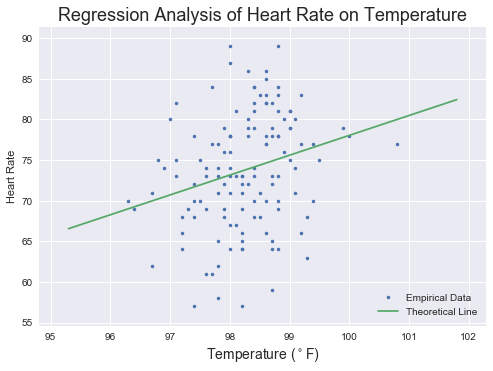

In [47]:
# Plot the empirical data and theoretical linear regression:
fig = plt.plot(df.temperature, df.heart_rate, marker='.', linestyle='none')
fig = plt.plot(x, y)

# Add a little room around the margins:
plt.margins(0.075)

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('Heart Rate')
fig = plt.legend(('Empirical Data', 'Theoretical Line'), loc='lower right')
fig = plt.title('Regression Analysis of Heart Rate on Temperature', fontsize=18)

# Display the plots:
plt.show()

The regression line certainly appears to be the best fit!

Finally, for the sake of more data science practice, a look at the variability expected in the linear regression:

In [48]:
def draw_linear_regression(x, y, size=1):
    """Draw bootstrap replicates for linear regression."""

    # Initialize array of indices:
    indices = np.arange(len(x))

    # Initialize arrays of slope and intercept replicates:
    slope_replicates = np.empty(size)
    intercept_replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        bootstrap_indices = np.random.choice(indices, size=len(indices))
        bootstrap_x, bootstrap_y = x[bootstrap_indices], y[bootstrap_indices]
        slope_replicates[i], intercept_replicates[i] = np.polyfit(bootstrap_x, bootstrap_y, 1)

    return slope_replicates, intercept_replicates

In [49]:
# Seed the random number generator:
np.random.seed(15)


# Generate replicates of slope and intercept:
a, b = draw_linear_regression(df.temperature, df.heart_rate, size=1000)

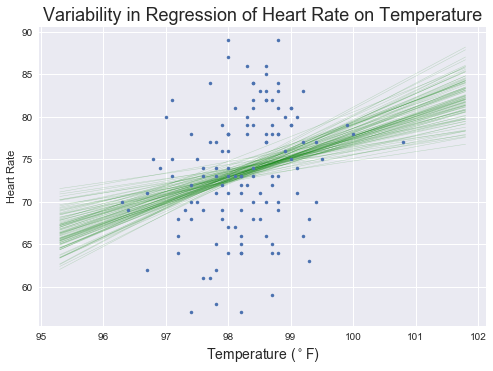

In [50]:
# Generate array of x-values:
x = np.array([df.temperature.min()-1, df.temperature.max()+1])

# Plot the bootstrap lines:
for i in range(100):
    y = a[i] * x + b[i]
    fig = plt.plot(x, y, linewidth=0.5, alpha=0.2, color='green')

# Plot the data:
fig = plt.plot(df.temperature, df.heart_rate, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('Heart Rate')
fig = plt.title('Variability in Regression of Heart Rate on Temperature', fontsize=18)

# Save and display the plots:
plt.savefig('reports/figures/regression_heartrate_temperature.png')
plt.show()

<a href='#top' id='summary'>back to intro</a>

## Summary and Conclusions
---

[Is the distribution of body temperatures normal?](#one)
* A CDF was constructed to determine whether the distribution of human body temperature is normal:
    
![CDF Confirming the Normal Distribution of Human Body Temperature](reports/figures/cdf_body_temps.png)
    
[Is the sample size large? Are the observations independent?](#two)
* The length of the temperature data column was retrieved to determine the sample size, 130, which is large. The temperature observations are independent, as each value for temperature represents a distinct measure of such.
    
[Is the true population mean really 98.6°F?](#three)
* A one-sample test was used since one set of data was compared to a single value. For this situation, it was best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results did not differ much using a z-statistic, which was estimated using the standard error of the mean.

        
* In every test the p-value is markedly less than the chosen significance level of 0.01, so the null hypothesis that the true population mean is equal to the conventional mean (98.6°F) was rejected.

[Draw a sample of size 10 from the data and repeat both tests.](#four)
* Since the population standard deviation is unkown and the sample size is small, the t-test was chosen again as the most appropriate. However, the z-test returned the most significant results, as it is the most sensitive of the two.
    
[At what value is one's temperature considered 'abnormal'?](#five)
* A look at the 95% and 99.9% confidence intervals left skepticism that abnormal human body temperature could be determined from analysis of this data. That's because looking at the confidence interval was the incorrect approach. A 95% prediction interval indicates temperatures below 96.8°F or higher than 99.7°F may be considered abnormal.
    
[Is there a significant difference between males and females in normal temperature?](#six)
* A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis was rejected. There is a difference in human body temperatures between females and males.

### What is the True Normal Human Body Temperature?

That's a good question, but it likely isn't the conventional value of 98.6°F. The average temperature from this study is 98.2°F, so perhaps that is the true normal human body temperature. 

Nonetheless, there is sufficient evidence to warrant rejection of the claim that the true population average is the conventional normal human body temperature of 98.6°F. Though it's a likely value:

![Distribution of Temperature Means](reports/figures/pdf_temps.png)

The difference in human body temperatures between females and males, though significant, is not extreme. Women tend to have a slightly higher body temperature:

![CDF of Female and Male Temperature Distributions](reports/figures/cdf_female_male_temps.png)

### And, What About the Relationship with Heart Rate?

There certainly appears to be a relationship. In fact, there is a positive correlation between human body temperature and heart rate:

![Regression Variance of Temperature and Heart Rate](reports/figures/regression_heartrate_temperature.png)

<a href='#top'>back to intro</a>